<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Формирование-функций" data-toc-modified-id="Формирование-функций-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Формирование функций</a></span></li><li><span><a href="#Загрузка-таблицы" data-toc-modified-id="Загрузка-таблицы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Загрузка таблицы</a></span></li></ul></li><li><span><a href="#Подготовка-и-анализ-данных" data-toc-modified-id="Подготовка-и-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка и анализ данных</a></span></li><li><span><a href="#Обучение-и-тестирование" data-toc-modified-id="Обучение-и-тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение и тестирование</a></span></li><li><span><a href="#Анализ-работы-модели" data-toc-modified-id="Анализ-работы-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ работы модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Введение

**Цель работы:**
Разработать модель, способную предсказать количество заказов такси на следующий час.

**Задачи, решаемые в работе:**
1. Проанализировать предоставленные данные.
2. Подготовить данные для обучения.
3. Сформировать и обучить несколько моделей.
4. Сделать выводы о проведеннй работе.

**План работы:**
1. Загрузить данные.
2. Ресемплировать их по 1 часу.
3. Проанализировать данные.
4. Сформировать пайплайн для обучения моделей.
5. Обучить несколько моделей.
6. Выбрать лучшую из них.
7. Проанализировать работу лучшей из них на тестовой выборке.
8. Сформировать выводы.

**Описание работы**
Компания «Чётенькое такси» предоставила исторические данные о заказах такси в аэропортах. Задача компании - привлекать больше водителей на время высокого спроса. Для этих целей нужно моделей, которая предскажет часы с высоким спросом.
Предоставленные данные: таблица taxi.
Столбцы таблицы:
- datetime - содержит информацию о времени и дате.
- num_orders - содержит информацию о количестве заказов с интевалом в 10 минут.


## Загрузка данных

### Загрузка библиотек

Для работы загрузим необходимые модули и библиотеки.

In [ ]:
!pip install scikit-learn==1.5.2
!pip install lightgbm

     |████████████████████████████████| 13.4 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 94.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [ ]:
# Библиотеки для подготовки данных
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Библиотеки для работы с моделями
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)


# Библиотеки для контроля качества.
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Библиотеки для построения графиков
import matplotlib.pyplot as plt


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>



### Формирование функций

Для работы потребуется функция подготовки признаков:

In [ ]:
# Функция создает новые столбцы из переданного датафрейма.
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

### Загрузка таблицы

Загрузим таблицу и ознакомимся с данными.

In [ ]:
df_taxi = pd.read_csv('/datasets/taxi.csv', index_col=['datetime'], parse_dates = ['datetime'])
df_taxi.sort_index(inplace=True)

In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [ ]:
df_taxi.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Данные загружены, пропусков нет, типы данных определился верно.

## Подготовка и анализ данных

Ресемплируем данные по одному часу:

In [ ]:
df_taxi = df_taxi.resample('1H').sum()

<div class="alert alert-block alert-success">
<b>Успех:</b> Первичный осмотр проведен, ресемпилнг был сделан верно.
</div>


Подготовим данные для анализа:

In [ ]:
decomposed = seasonal_decompose(df_taxi['num_orders'])

Проанализируем полученные данные.

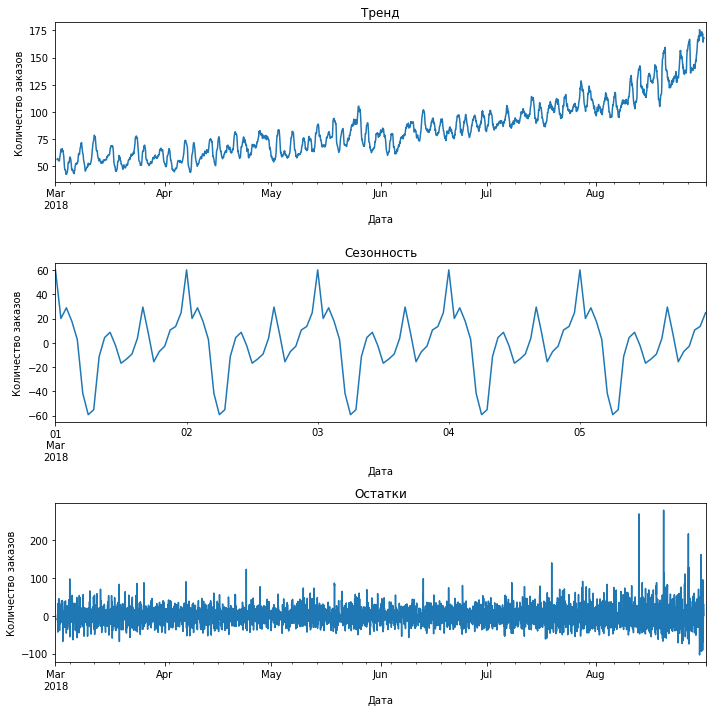

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-05'].plot(ax=plt.gca())
plt.title('Сезонность')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остатки')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.tight_layout()

Из данных видно следующее:
1. К осени количество заказов увеличивается.
2. Осенью тренд немного ускоряется.
3. В августе наблюдается небольшое снижение числа заказов.
4. Наибольшее количество заказов приходиться на смену суток в районее 0:00 часов, за которым следует резкий спад.
5. Наименьшее количество заказов в районе 5 утра.
6. В течение дня фиксируются два пика увеличения заказов. Скорее всего это связано с часами пик, когда люди едут на работу и с работы.
7. Остатков больше к концу года, следовательно, осенью и зимой больше аномальный, выпадающих значений.

Отдельно посмотрим сезонность по неделям. Для этого ресемплируем данные по дням и построим график.

In [ ]:
df_taxi_day = df_taxi.resample('1D').sum()

In [ ]:
decomposed_day = seasonal_decompose(df_taxi_day['num_orders'])

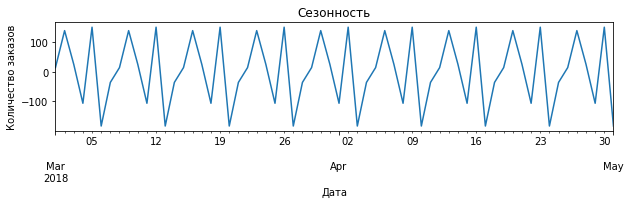

In [ ]:
plt.figure(figsize=(10, 2))
decomposed_day.seasonal['2018-03-01':'2018-05-01'].plot(ax=plt.gca())
plt.title('Сезонность')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

Как видно из графика, в течение недели количество заказов не постоянное. Так, на понедельники (к примеру, 05.03.2018) приходится максимальное количество заказов. Во вторник количество заказов резко снижается и плавно восстанавливается к пятнице, где ещё один пик. Потом количество заказов снова снижается в субботу и растет всё воскресенье с пиком в понедельник.   

Для обучения модели нужно добавить новые признаки, так как скользящее среднее, месяц, день, день недели и смещение. Для этого воспользуемся функцией.

In [ ]:
df_taxi_feat = make_features(df_taxi, 6, 1)

In [ ]:
df_taxi_feat.head()

,num_orders,hour,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,
2018-03-01 00:00:00,124,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,1,3,124.0,NaN,NaN,NaN,NaN,NaN,124.0
2018-03-01 02:00:00,71,2,1,3,85.0,124.0,NaN,NaN,NaN,NaN,85.0
2018-03-01 03:00:00,66,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,71.0
2018-03-01 04:00:00,43,4,1,3,66.0,71.0,85.0,124.0,NaN,NaN,66.0


Также необходимо сделать ряд стационарным для улучшения качества прогноза:

In [ ]:
#df_taxi = df_taxi - df_taxi.shift()
df_taxi_feat['mean'] = df_taxi_feat['num_orders'].shift().rolling(15).mean()
df_taxi_feat['std'] = df_taxi_feat['num_orders'].shift().rolling(15).std()

Проверим, как выглядит таблица после преобразований

In [ ]:
df_taxi_feat.head()

,num_orders,hour,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean,mean,std
datetime,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,1,3,124.0,NaN,NaN,NaN,NaN,NaN,124.0,NaN,NaN
2018-03-01 02:00:00,71,2,1,3,85.0,124.0,NaN,NaN,NaN,NaN,85.0,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,71.0,NaN,NaN
2018-03-01 04:00:00,43,4,1,3,66.0,71.0,85.0,124.0,NaN,NaN,66.0,NaN,NaN


Преобразования выполнены успешно.

## Обучение и тестирование

Предварительно разделим данные на тренировочную и тестовую выборки:

In [ ]:
train, test = train_test_split(df_taxi_feat, shuffle=False, test_size=0.1)
train = train.dropna()

X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

X_train.shape, X_test.shape

((3959, 12), (442, 12))

Перебор модели и оценки её качества будем проводить в пайплайн. Так сразу после перебора получим результаты контроля качества.

In [ ]:
# создаём списки с названиями признаков
ohe_columns = ['hour',
               'day',
               'dayofweek'
              ]
num_columns = ['rolling_mean',
               'lag_1',
               'lag_2',
               'lag_3',
               'lag_4',
               'lag_5',
               'lag_6',
               'mean',
               'std'
              ]

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False))
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

In [ ]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

param_grid = [
    # словарь для моделей
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },


    {
        'models': [LGBMRegressor()],
        'models__num_leaves':[5, 10],
        'models__max_depth':[5, 10],
        'models__learning_rate':[0.5],
        'models__n_estimators':[50, 100],
        'models__subsample_for_bin':[10000, 100000],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
        'models': [CatBoostRegressor()],
        'models__iterations':[2, 5, 10],
        'models__depth':[2, 10],
        'models__learning_rate':[1],
        'models__loss_function':['RMSE'],
        'models__logging_level':['Silent'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }


]


In [ ]:
%%time

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n',grid_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидационной выборке:', grid_search.best_score_)

# проверка работы модели на тестовой выборке
y_test_pred = grid_search.predict(X_test)
print(f'Метрика RMSE на тестовой выборке: {root_mean_squared_error(y_test, y_test_pred)}')

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hour', 'day', 'dayofweek']),
                                                 ('num', StandardScaler(),
                                                  ['rolling_mean', 'lag_1',
        

Наилучшая модель по итогам перебора является LGBMRegressor. Её метрика на тестовой выборке составила 43,3, что меньше 48. Модель обеспечивает нужное качество.

## Анализ работы модели

В целях оценки работы модели получим предсказания по всему датасету и построим график. На графике отложим фактические значения и предсказанные.

In [ ]:
model = grid_search.best_estimator_.named_steps['models']

In [ ]:
preprocessor = grid_search.best_estimator_.named_steps['preprocessor']

In [ ]:
df_taxi_preproc = preprocessor.transform(df_taxi_feat.drop('num_orders', axis=1))

In [ ]:
preds = model.predict(df_taxi_preproc)

In [ ]:
df_preds = pd.DataFrame(preds).rename(columns={0:'pred_orders'})

In [ ]:
df_preds.index = df_taxi_feat.index[:len(df_preds)]

In [ ]:
df_taxi_feat = df_taxi_feat.join(df_preds)

Проверим, как предсказания добавились в общую таблицу.

In [ ]:
df_taxi_feat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   hour          4416 non-null   int64  
 2   day           4416 non-null   int64  
 3   dayofweek     4416 non-null   int64  
 4   lag_1         4415 non-null   float64
 5   lag_2         4414 non-null   float64
 6   lag_3         4413 non-null   float64
 7   lag_4         4412 non-null   float64
 8   lag_5         4411 non-null   float64
 9   lag_6         4410 non-null   float64
 10  rolling_mean  4415 non-null   float64
 11  mean          4401 non-null   float64
 12  std           4401 non-null   float64
 13  pred_orders   4416 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 517.5 KB


Добавились корректно. Теперь построим график.

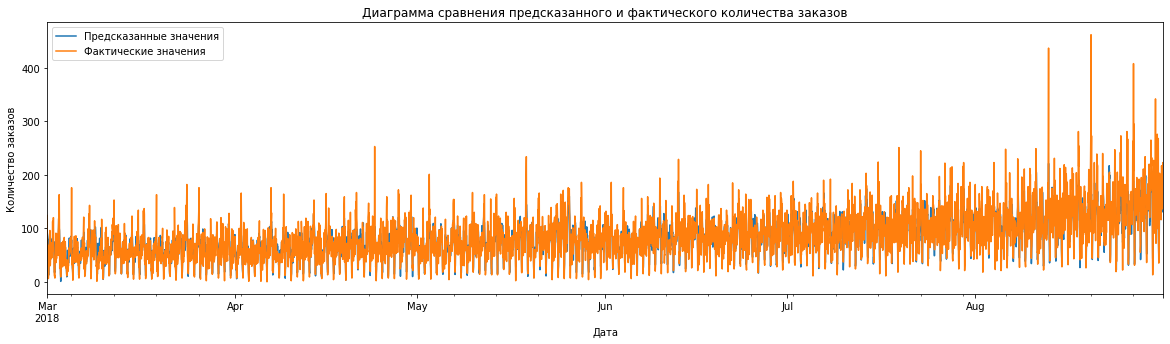

In [ ]:
df_taxi_feat.loc[:,['pred_orders','num_orders']].plot(kind='line', grid=False, figsize=(20, 5))
plt.title('Диаграмма сравнения предсказанного и фактического количества заказов')
plt.legend(['Предсказанные значения', 'Фактические значения'])
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

Как видно из диаграммы, лучше всего модель предсказывает количество заказов в весенние месяцы и хуже всего ближе к осени в тех местах, где были аномальные значения.

## Вывод

**В рамках работы проведено:**
1. Загрузка данных.
2. Ресемплирование значений.
3. Анализ предоставленной информации.
4. Обучение трех моделей: LGBMRegressor, CatBoostRegressor и LinearRegression.
5. Проведен контроль качества полученных моделей.

**Результаты работы:**
1. Наилучшая модель по результатам обучения оказалась LGBMRegressor.
2. Метрика модели составила 43.9, что меньше 48.

**Рекомендации по улучшению качества прогноза:**
1. Предоставить информацию о количестве заказов по районам города.
2. Предоставить информацию о классе машины для каждого заказа.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48